# Experiment: Validation

In this notebook, you can compare and validate your own WindFarmModel (i.e. combination of engineering submodels) with data from RANS, LES and measurements 

## Initialize

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [2]:
import numpy as np
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
# import all available models
from py_wake.deficit_models import *
from py_wake.wind_farm_models import *
from py_wake.rotor_avg_models import *
from py_wake.superposition_models import *
from py_wake.deflection_models import *
from py_wake.turbulence_models import *
from py_wake.ground_models import *

In [4]:
# prepare for the model combination tool
from py_wake.utils.model_utils import get_models, get_signature
from ipywidgets import interact
from IPython.display import HTML, display, Javascript

# Fix ipywidget label width
display(HTML('''<style>.widget-label { min-width: 20ex !important; }</style>'''))


def print_signature(windFarmModel, **kwargs):
    s = """# insert windFarmModel code below
wfm = %s

validation.add_windFarmModel('MyModelName', wfm)"""% get_signature(windFarmModel, kwargs, 1)
        
    # Write windFarmModel code to cell starting "# insert windFarmModel code below"
    display(Javascript("""
for (var cell of IPython.notebook.get_cells()) {
    if (cell.get_text().startsWith("# insert windFarmModel code below")){
        cell.set_text(`%s`)
    }
}"""%s))

# setup list of models
models = {n:[(getattr(m,'__name__',m), m) for m in get_models(cls)] 
          for n,cls in [('windFarmModel', WindFarmModel),
                        ('wake_deficitModel', WakeDeficitModel),
                        ('rotorAvgModel', RotorAvgModel),
                        ('superpositionModel', SuperpositionModel),
                        ('blockage_deficitModel', BlockageDeficitModel),
                        ('deflectionModel',DeflectionModel),
                        ('turbulenceModel', TurbulenceModel),
                        ('groundModel', GroundModel)
                        ]}

In [5]:
from py_wake.validation.validation import Validation, ValidationSite, ValidationWindTurbines
site, windTurbines = ValidationSite(), ValidationWindTurbines()

## Setup Validation
Instantiate new Validation. This cell removes previously added windFarmModels

In [6]:
validation = Validation()

### Add WindFarmModels
Add as many windFarmModels as you wish with the function

```
validation.add_windFarmModel(name, windFarmModel, line_style='-')
```

for example:

```
wfm = PropagateDownwind(site, windTurbines, wake_deficitModel=NOJDeficit(k=0.04))
validation.add_windFarmModel("NOJ(k=0.04)", wfm, ':')
```

You can use the dropdown boxes here to update the code cell below. Note, that some models needs manual specification of some non-optional arguments

In [7]:
_ = interact(print_signature, **models)

interactive(children=(Dropdown(description='windFarmModel', options=(('PropagateDownwind', <class 'py_wake.win…

In the cell below:

- Replace `MyModelName` with a name for the windFarmModel
- Set unspecified arguments, if any
- Run the cell below to add the windFarmModel to the validation

In [8]:
# insert windFarmModel code below
wfm = PropagateDownwind(
    site,
    windTurbines,
    wake_deficitModel=NOJDeficit(
        k=0.1,
        use_effective_ws=False),
    rotorAvgModel=RotorCenter(),
    superpositionModel=SquaredSum(),
    deflectionModel=None,
    turbulenceModel=None,
    groundModel=NoGround())

validation.add_windFarmModel('MyModelName', wfm)

In [9]:
# print name of added wind farm models
print(validation.windFarmModel_dict.keys())

dict_keys(['MyModelName'])


## Single wake deficit validation

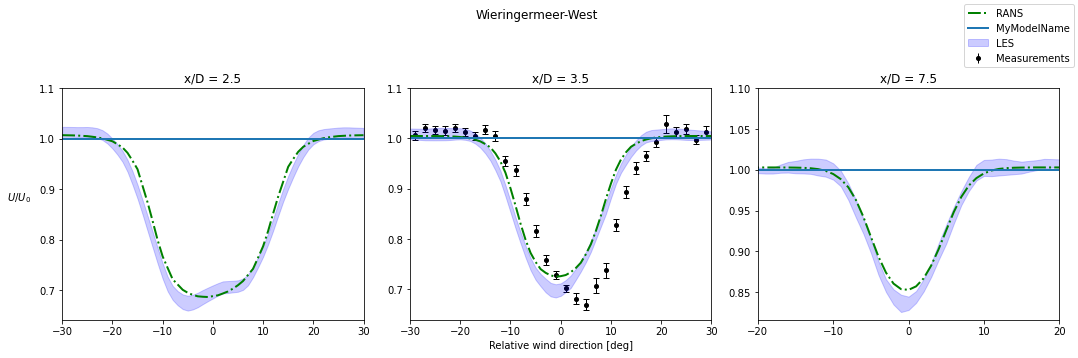

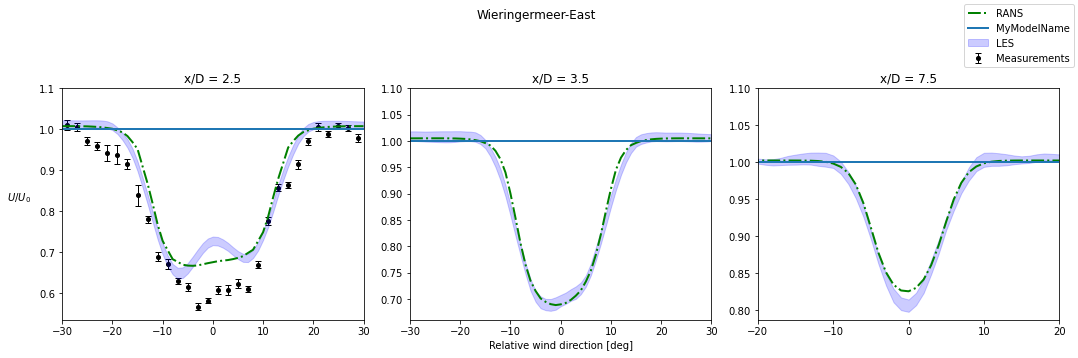

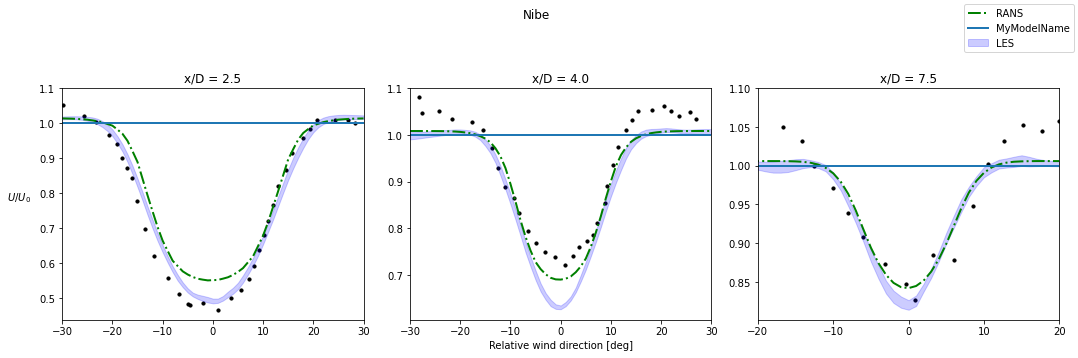

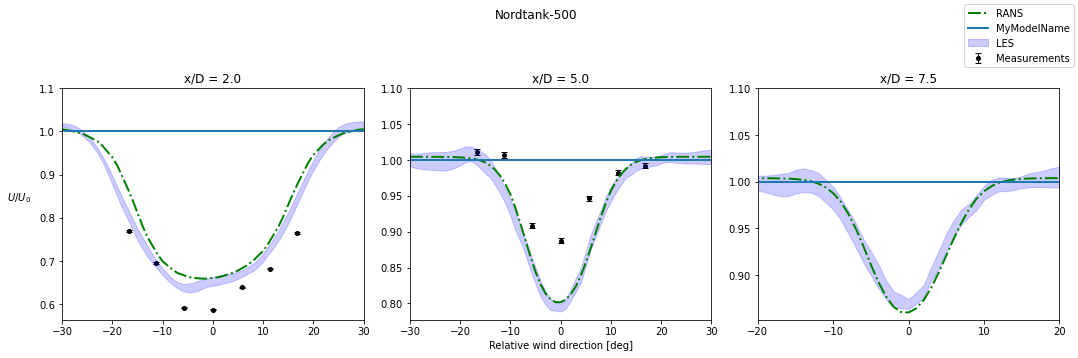

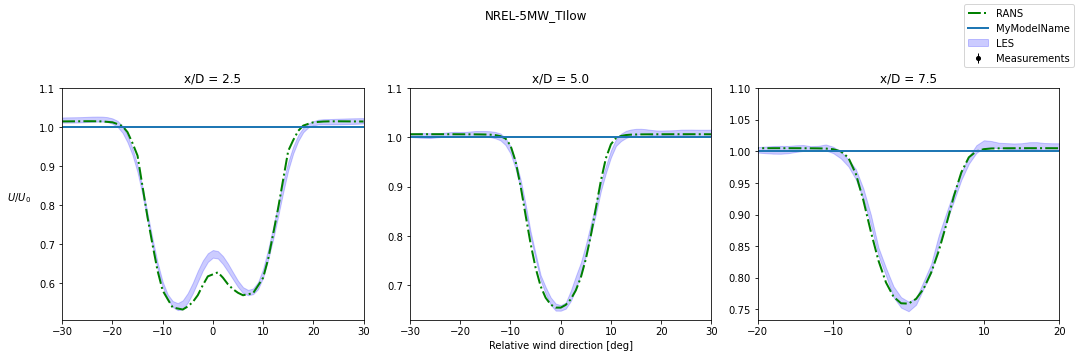

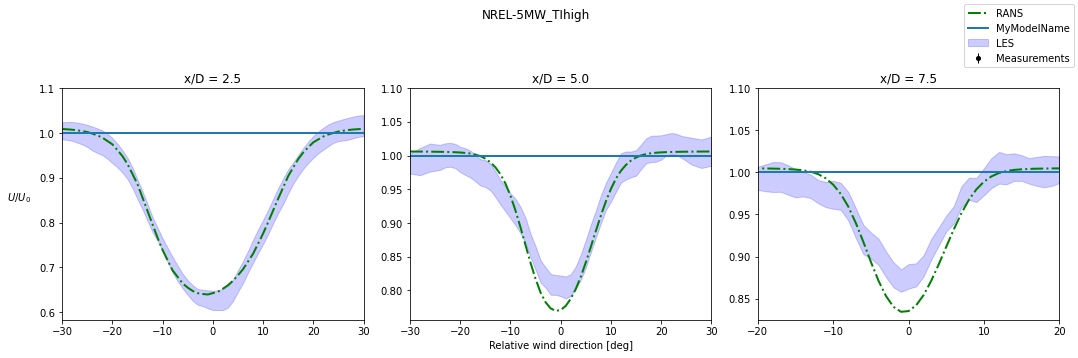

In [10]:
validation.plot_deficit_profile()

## Single wake integrated momentum deficit validation

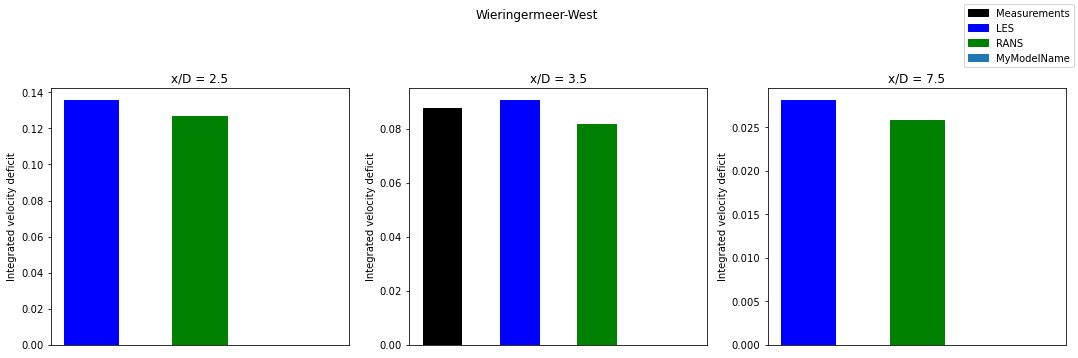

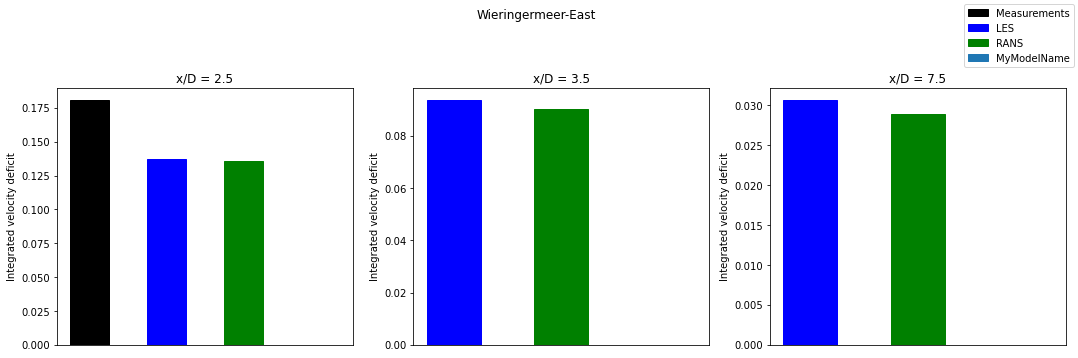

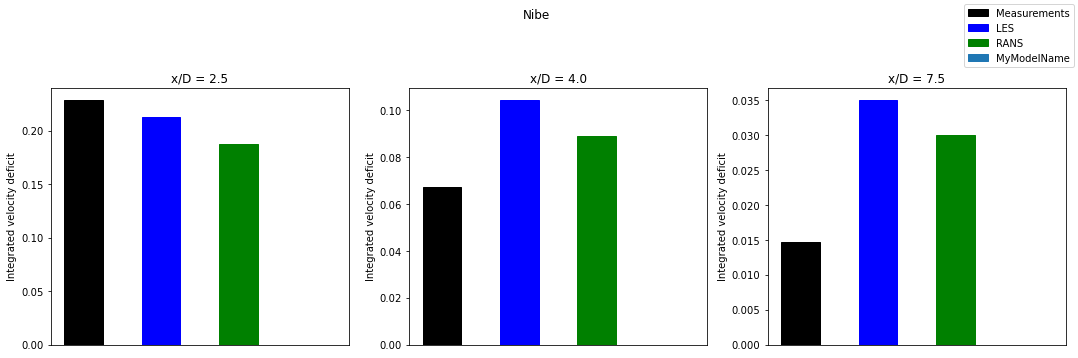

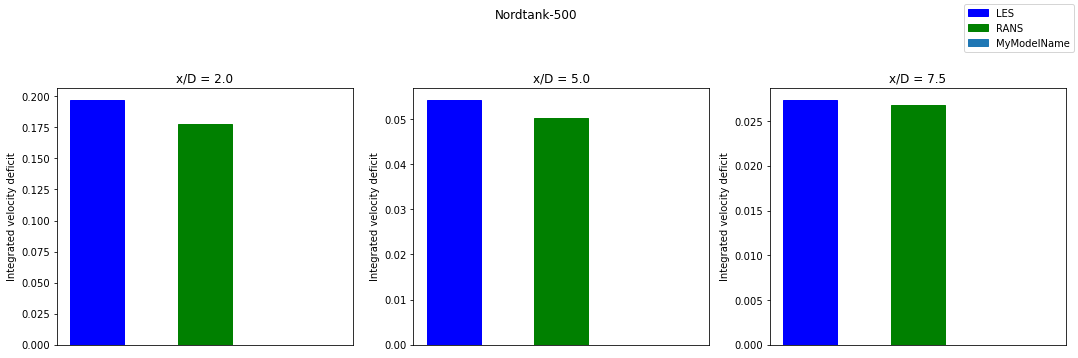

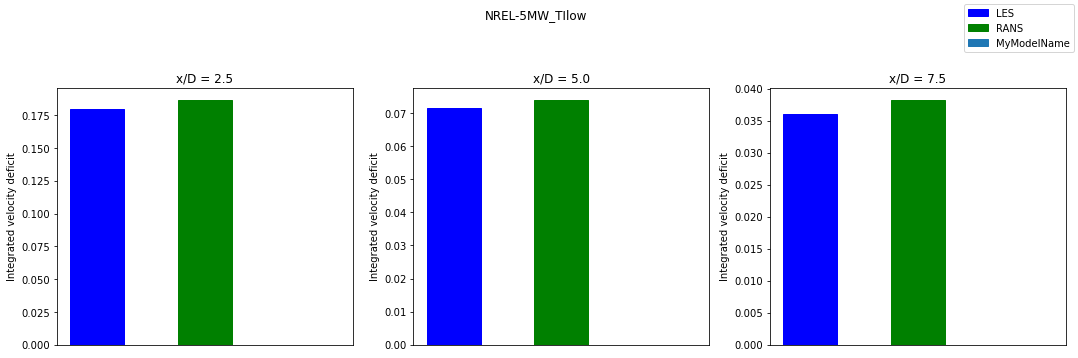

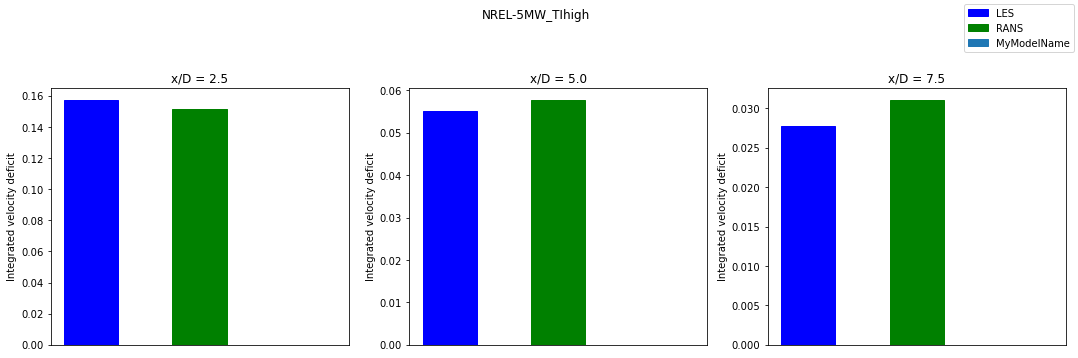

In [11]:
validation.plot_integrated_deficit()

## Wind farm power validation

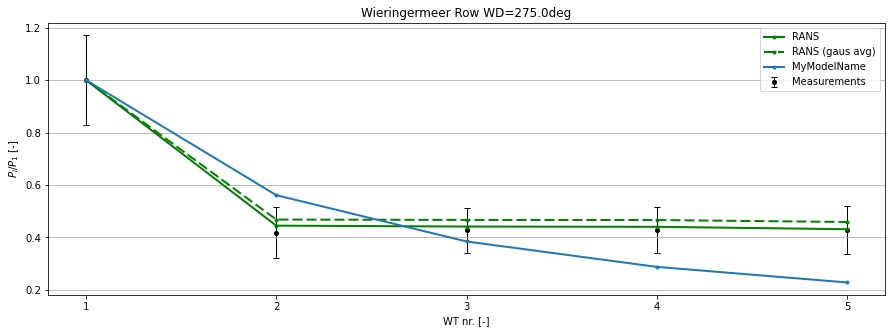

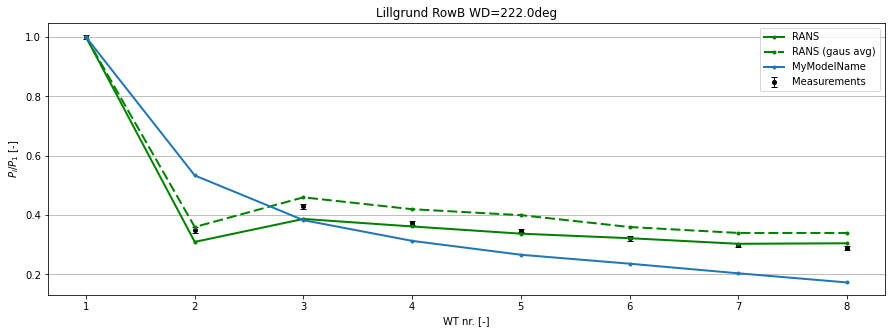

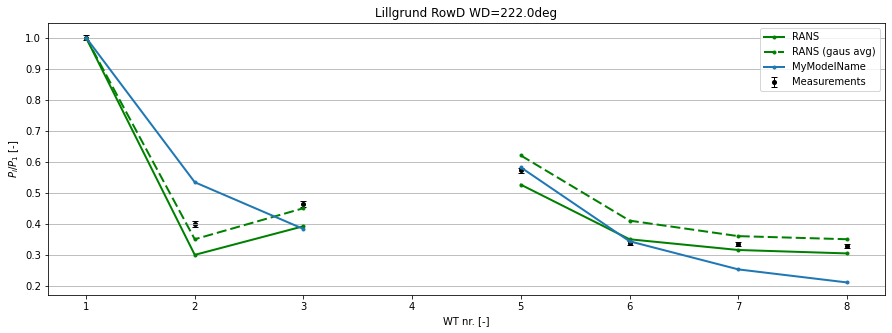

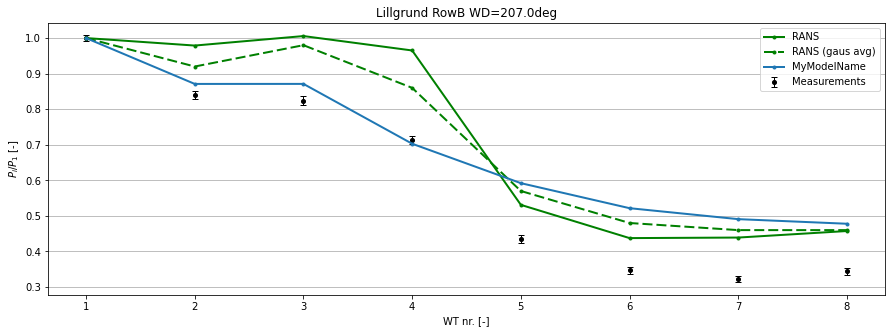

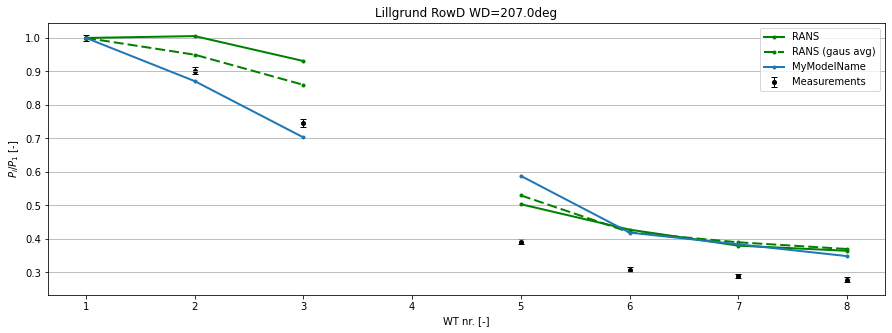

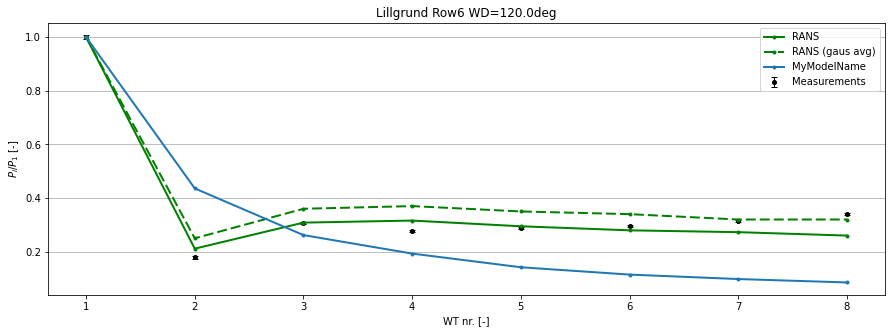

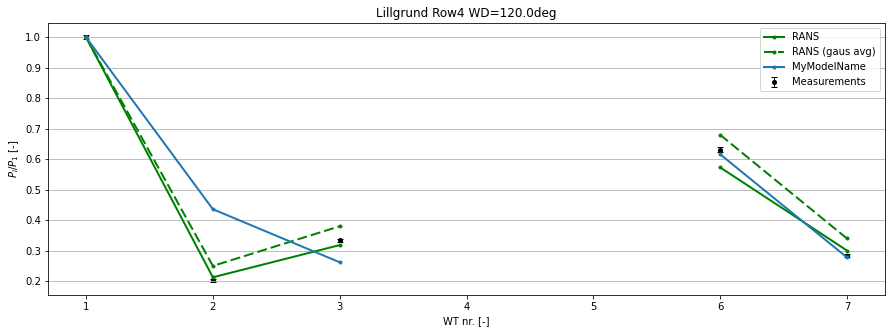

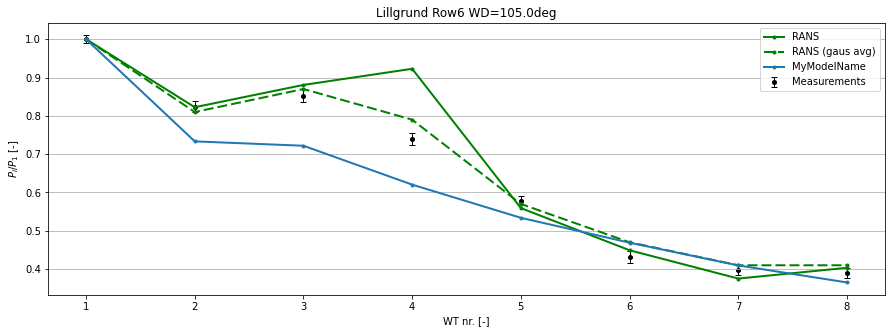

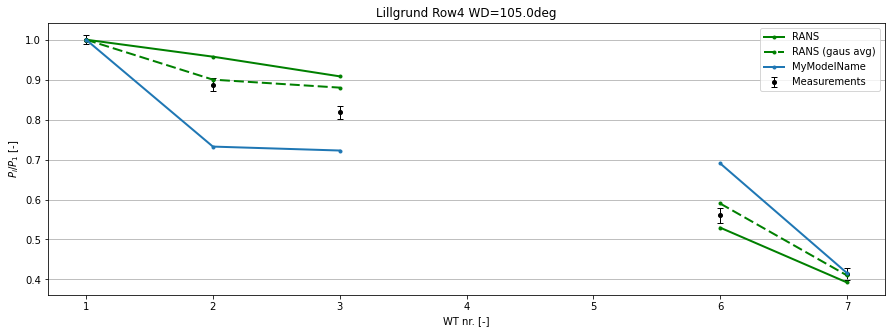

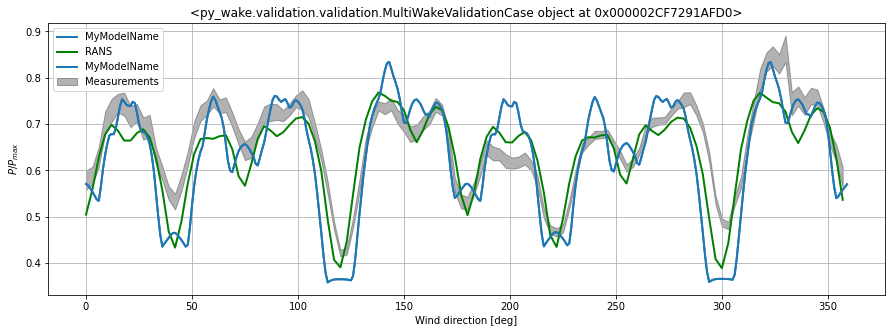

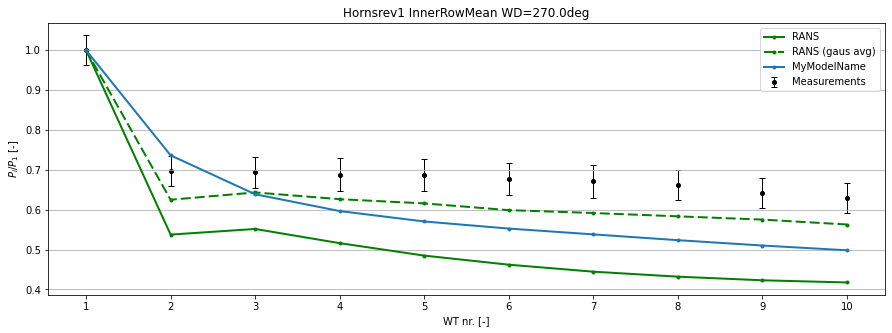

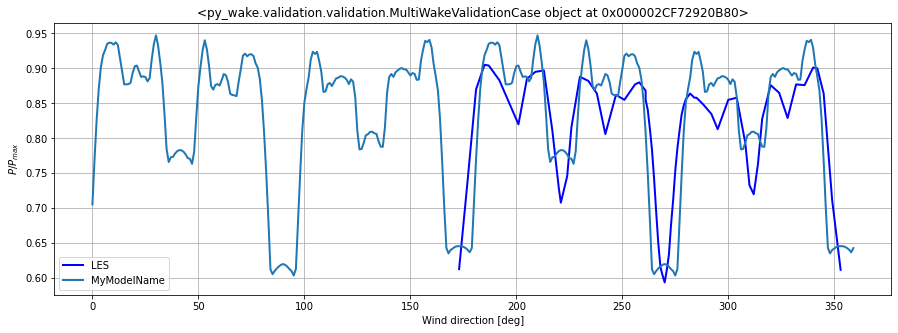

In [12]:
validation.plot_multiwake_power()